# Workshop 1: Mobile Price Range Classification

In this workshop we will learn how to train a neural network with numeric data as input to predict the price range of mobile phones ([info of the data](https://www.kaggle.com/iabhishekofficial/mobile-price-classification/data#)). The main blocks of the workshop are:

1. Get the data from Google Drive.
2. Load and Pre-process the data.
3. Define a Fully Connected Neural Network.
4. Choose loss function and optimizer.
5. Train the network.

The main libraries thar will be used in the workshop are:

- Tensorflow
- Keras
- Sci-kit Learn
- Matplotlib
- Numpy
- Pandas

[Reference](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)

## 1. Get the data from Google Drive

In [ ]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download data
download = drive.CreateFile({'id': '1igTyUp-YTHG0ig9VeNu83R8jBWn5Djji'})
download.GetContentFile('mobile_price.zip')

In [ ]:
# Extract data from zip file
import zipfile
from pathlib import Path
data_path = Path("./mobile_price.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [ ]:
# List files of ./data directory
!ls ./data

test.csv  train.csv


## 2. Load and Pre-process the data



In [ ]:
# Load dependencies for loading data
import numpy as np
import pandas as pd

In [ ]:
# Load training dataset and check variables
dataset = pd.read_csv('./data/train.csv')

In [ ]:
# Show variables
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Show first 5 rows
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Convert pandas Dataframe to Numpy Array
dataset_numpy = dataset.values

In [ ]:
# Show data type before and after conversion
print(type(dataset))
print(type(dataset_numpy.dtype)) #convertir siempre los datasets a numpy porque con df no sabe trabajar

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.dtypes.Float64DType'>


In [ ]:
# Separate input variables from output label
X = dataset_numpy[:, :20]
y = dataset_numpy[:, 20:21]

In [ ]:
# Show shape of training data and labels
print("Shape of training data: ", X.shape)
print("Shape of training labels: ", y.shape)

Shape of training data:  (2000, 20)
Shape of training labels:  (2000, 1)


In [ ]:
# Show different classes to predict
np.unique(y)

array([0., 1., 2., 3.])

In [ ]:
# Normalizing the data to improve stability while training
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [ ]:
# Show mean and Standard Deviation learnt from training data
print("Mean per variable: \n", sc.mean_)
print("Standard Deviation per variable: \n", sc.scale_)

Mean per variable: 
 [1.2385185e+03 4.9500000e-01 1.5222500e+00 5.0950000e-01 4.3095000e+00
 5.2150000e-01 3.2046500e+01 5.0175000e-01 1.4024900e+02 4.5205000e+00
 9.9165000e+00 6.4510800e+02 1.2515155e+03 2.1242130e+03 1.2306500e+01
 5.7670000e+00 1.1011000e+01 7.6150000e-01 5.0300000e-01 5.0700000e-01]
Standard Deviation per variable: 
 [4.39308338e+02 4.99974999e-01 8.15800182e-01 4.99909742e-01
 4.34035825e+00 4.99537536e-01 1.81411780e+01 2.88343437e-01
 3.53908039e+01 2.28726469e+00 6.06279867e+00 4.43669852e+02
 4.32091384e+02 1.08446083e+03 4.21219156e+00 4.35530837e+00
 5.46258904e+00 4.26166341e-01 4.99991000e-01 4.99950998e-01]


In [ ]:
# Show data before and after normalization
print("Before normalization: \n", X[1, :])
print("After normalization: \n", X_norm[1, :])

Before normalization: 
 [1.021e+03 1.000e+00 5.000e-01 1.000e+00 0.000e+00 1.000e+00 5.300e+01
 7.000e-01 1.360e+02 3.000e+00 6.000e+00 9.050e+02 1.988e+03 2.631e+03
 1.700e+01 3.000e+00 7.000e+00 1.000e+00 1.000e+00 0.000e+00]
After normalization: 
 [-0.49513857  1.0100505  -1.2530642   0.98117712 -0.99289039  0.95788598
  1.15502422  0.68754816 -0.12005944 -0.66476784 -0.64598879  0.58577791
  1.70446468  0.46731702  1.11426556 -0.63531667 -0.73426721  0.55964063
  0.99401789 -1.01409939]


In [ ]:
y

array([[1.],
       [2.],
       [2.],
       ...,
       [3.],
       [0.],
       [3.]])

In [ ]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [ ]:
# Show labels before and after one-hot encoding
print("Before onet-hot encodeing: \n", y[0])
print("After onet-hot encodeing: \n", y_onehot[0]) # la salida de la red neuronal va a tener ese formato y vera clase a clase si coiciden

Before onet-hot encodeing: 
 [1.]
After onet-hot encodeing: 
 [0. 1. 0. 0.]


In [ ]:
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot,
                                                  test_size=0.1)

In [ ]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (1800, 20)
Size of training labels:  (1800, 4)
Size of validation data:  (200, 20)
Size of validation labels:  (200, 4)


## 3. Define a Fully Connected Neural Network

In [ ]:
# Import dependencies for designing Keras model
from tensorflow import keras
from keras.models import Sequential #porque la redes son una secuencia de computos
from keras.layers import Dense

In [ ]:
# Design simple neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu')) #capa1 (entrada) al ser la entrada le tengo que decir las variables de entrada que son 20. 16 neuronas porque he querido. En las capas de entrada relu suele ser la que mejor funciona
model.add(Dense(12, activation='relu')) # capa 'densa' significa totalmente conectada. Esta es una capa oculta de 12 neuronas
model.add(Dense(4, activation='softmax')) # capa de salida, hay 4 neuronas porque hay cuatro clases y es softmax porque como es unietiqueta los valores que devuelven s entre 0 y 1 y la suma de las respuestas tiene que ser igual a 1

In [ ]:
# Show model information
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 592 (2.31 KB)
Trainable params: 592 (2.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The number of parameters of each layer is obtained as follows:


*   params_dense_1 = (input_var_num + 1) * dense_1_neurons = (20 + 1) * 16 = 336
*   params_dense_2 = (dense_1_neurons + 1) * dense_2_neurons = (16 + 1) * 12 =      204
*   params_dense_3 = (dense_2_neurons + 1) * dense_3_neurons = (12 + 1) * 4 =      52

Where +1 comes from the bias term added in each layer.




## 4. Choose loss function and optimizer


In [ ]:
# Choose loss function, optimizer and training metrics
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy']) # esto es la compilación del modelo. la clasificacion multiclase siempre usar categorical_crossentropy. optimazer es la manera de implementar el proceso de apredizage (siempre adam)

## 5. Train the network



In [ ]:
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val)) #oom significa que la gpu se ha quedado sin memoria por lo que hay que disminuir el batch_size

Epoch 1/100
29/29 [==============================] - 3s 20ms/step - loss: 1.4780 - accuracy: 0.2183 - val_loss: 1.4361 - val_accuracy: 0.2300
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 1.3800 - accuracy: 0.2833 - val_loss: 1.3908 - val_accuracy: 0.2750
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3204 - accuracy: 0.3606 - val_loss: 1.3373 - val_accuracy: 0.3400
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2611 - accuracy: 0.4211 - val_loss: 1.2825 - val_accuracy: 0.3850
Epoch 5/100
29/29 [==============================] - 0s 10ms/step - loss: 1.1957 - accuracy: 0.4772 - val_loss: 1.2169 - val_accuracy: 0.4200
Epoch 6/100
29/29 [==============================] - 0s 9ms/step - loss: 1.1201 - accuracy: 0.5261 - val_loss: 1.1391 - val_accuracy: 0.4900
Epoch 7/100
29/29 [==============================] - 0s 8ms/step - loss: 1.0394 - accuracy: 0.5672 - val_loss: 1.0610 - val_accuracy: 0.5300
Epoch 8/100

In [ ]:
# Import dependence for plotting training process
import matplotlib.pyplot as plt

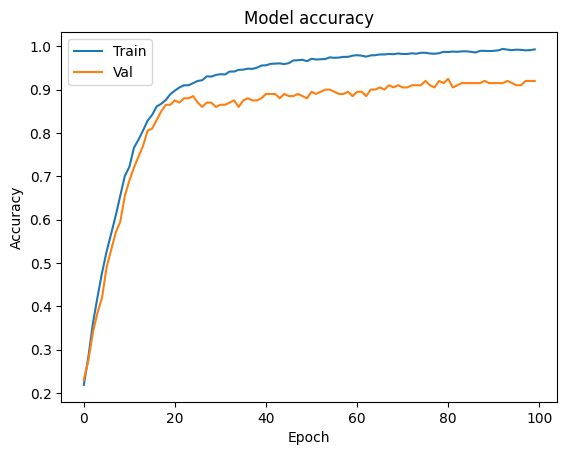

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

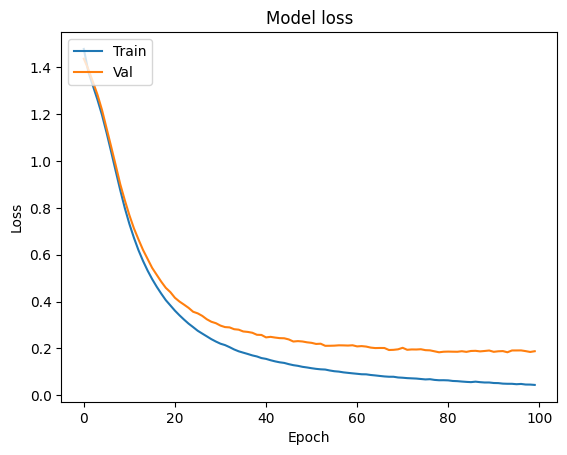

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# Save the model
from pathlib import Path
path = Path('./models')
if not path.exists():
  path.mkdir()
model.save('./models/model_1.h5') # para guardar el modelo una vez es entrenado lo que se guarda son los pesos que ha aprendido el modelo.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# List files of ./models directory
!ls ./models

model_1.h5


# Exercise 1: Train the model without normalization

In [ ]:
# Split data without normalization in training and validation partitions
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y_onehot,
                                                  test_size=0.1)


In [ ]:
# Train the model
# Design simple neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu')) #capa1 (entrada) al ser la entrada le tengo que decir las variables de entrada que son 20. 16 neuronas porque he querido. En las capas de entrada relu suele ser la que mejor funciona
model.add(Dense(12, activation='relu')) # capa 'densa' significa totalmente conectada. Esta es una capa oculta de 12 neuronas
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train1, y_train1, epochs=100, batch_size=64,
                    validation_data=(X_val1, y_val1))

Epoch 1/100
29/29 [==============================] - 2s 19ms/step - loss: 45.9492 - accuracy: 0.2711 - val_loss: 27.7489 - val_accuracy: 0.3650
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 18.8385 - accuracy: 0.4044 - val_loss: 9.4451 - val_accuracy: 0.3850
Epoch 3/100
29/29 [==============================] - 0s 9ms/step - loss: 3.3004 - accuracy: 0.2844 - val_loss: 1.4789 - val_accuracy: 0.2650
Epoch 4/100
29/29 [==============================] - 0s 11ms/step - loss: 1.4732 - accuracy: 0.2444 - val_loss: 1.3890 - val_accuracy: 0.2750
Epoch 5/100
29/29 [==============================] - 0s 13ms/step - loss: 1.3983 - accuracy: 0.2456 - val_loss: 1.3588 - val_accuracy: 0.2600
Epoch 6/100
29/29 [==============================] - 0s 15ms/step - loss: 1.3945 - accuracy: 0.2450 - val_loss: 1.3525 - val_accuracy: 0.2550
Epoch 7/100
29/29 [==============================] - 0s 17ms/step - loss: 1.3739 - accuracy: 0.2444 - val_loss: 1.3594 - val_accuracy: 0.2700
Epoch

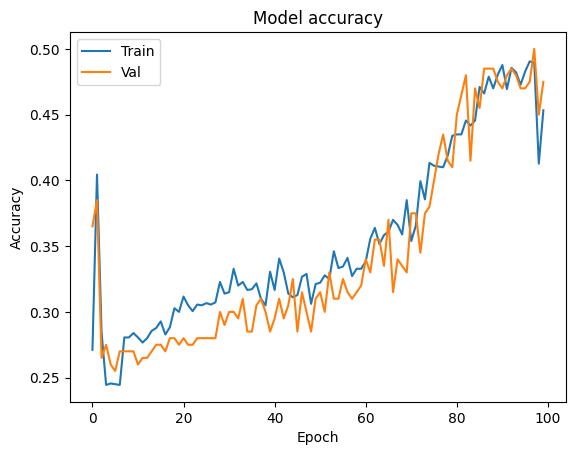

In [ ]:
# Plot training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

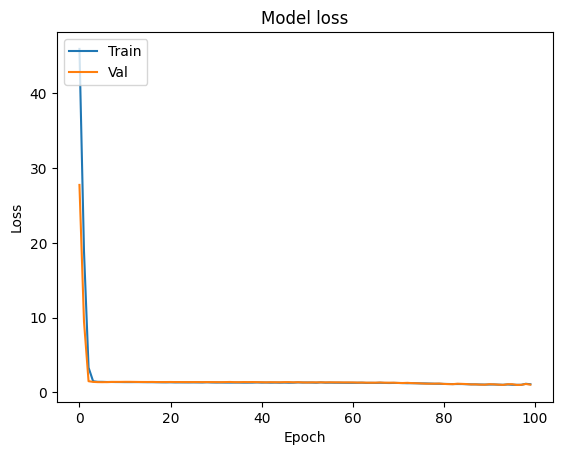

In [ ]:
# Plot training and test loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Exercise 2: Train a simpler model and evaluate the results

In [ ]:
# Split data with normalization in training and validation partitions

X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot,
                                                  test_size=0.1)


In [ ]:
# Design a model like the previous but without the second Dense layer
# Train the model
# Design simple neural network architecture
model = Sequential()
model.add(Dense(8, input_dim=20, activation='relu')) #capa1 (entrada) al ser la entrada le tengo que decir las variables de entrada que son 20. 16 neuronas porque he querido. En las capas de entrada relu suele ser la que mejor funciona
model.add(Dense(4, activation='softmax'))




In [ ]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val))


Epoch 1/100
29/29 [==============================] - 2s 15ms/step - loss: 1.4132 - accuracy: 0.2900 - val_loss: 1.3720 - val_accuracy: 0.3200
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3698 - accuracy: 0.3233 - val_loss: 1.3479 - val_accuracy: 0.3500
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3387 - accuracy: 0.3578 - val_loss: 1.3252 - val_accuracy: 0.3550
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3072 - accuracy: 0.3922 - val_loss: 1.2983 - val_accuracy: 0.3800
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2707 - accuracy: 0.4233 - val_loss: 1.2654 - val_accuracy: 0.4200
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2265 - accuracy: 0.4461 - val_loss: 1.2200 - val_accuracy: 0.4500
Epoch 7/100
29/29 [==============================] - 0s 9ms/step - loss: 1.1770 - accuracy: 0.4861 - val_loss: 1.1729 - val_accuracy: 0.4750
Epoch 8/100


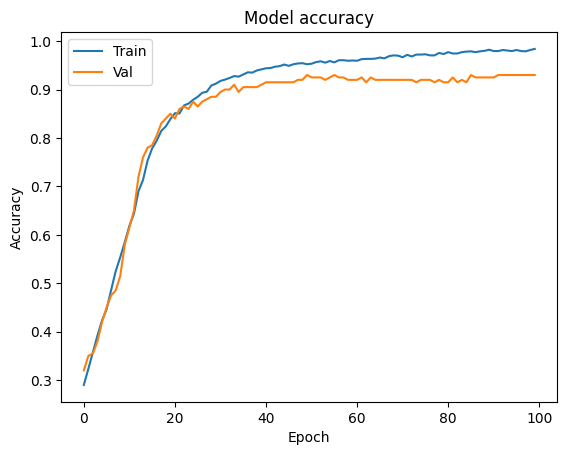

In [ ]:
# Plot training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

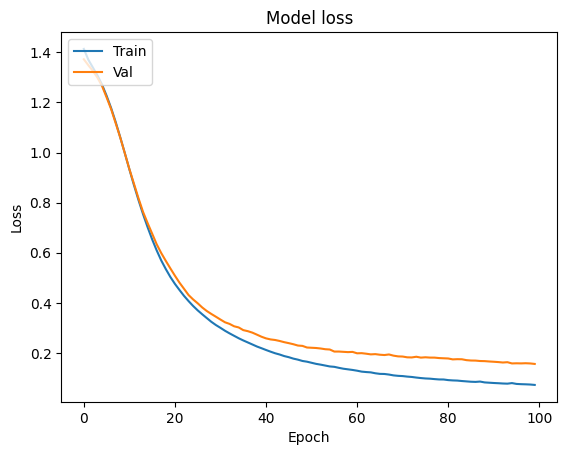

In [ ]:
# Plot training and test loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Exercise 3: Train a more complex model and evaluate the results

In [ ]:
# Split data with normalization in training and validation partitions


In [ ]:
# Design a model like the previous but with 128 neurons in the first Dense layer
# and 256 in the second

model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu')) #capa1 (entrada) al ser la entrada le tengo que decir las variables de entrada que son 20. 16 neuronas porque he querido. En las capas de entrada relu suele ser la que mejor funciona
model.add(Dense(256, activation='relu')) # capa 'densa' significa totalmente conectada. Esta es una capa oculta de 12 neuronas
model.add(Dense(4, activation='softmax'))


In [ ]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 4s 17ms/step - loss: 1.1626 - accuracy: 0.5311 - val_loss: 0.9366 - val_accuracy: 0.6000
Epoch 2/100
29/29 [==============================] - 0s 10ms/step - loss: 0.7072 - accuracy: 0.7478 - val_loss: 0.6287 - val_accuracy: 0.7750
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 0.4587 - accuracy: 0.8678 - val_loss: 0.4457 - val_accuracy: 0.8400
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 0.3297 - accuracy: 0.9106 - val_loss: 0.3652 - val_accuracy: 0.8650
Epoch 5/100
29/29 [==============================] - 0s 8ms/step - loss: 0.2462 - accuracy: 0.9344 - val_loss: 0.2952 - val_accuracy: 0.9000
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1928 - accuracy: 0.9506 - val_loss: 0.2694 - val_accuracy: 0.9000
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1535 - accuracy: 0.9650 - val_loss: 0.2605 - val_accuracy: 0.8950
Epoch 8/100

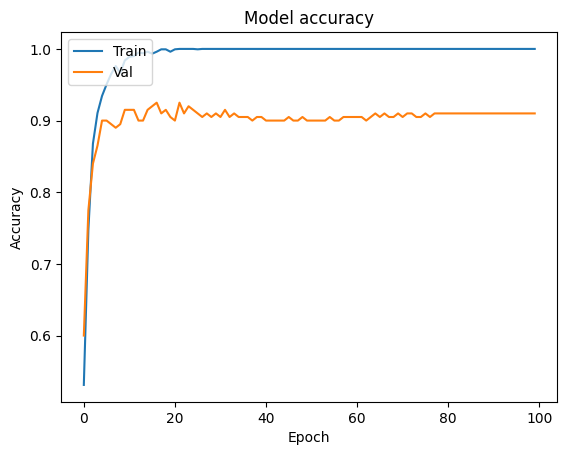

In [ ]:
# Plot training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

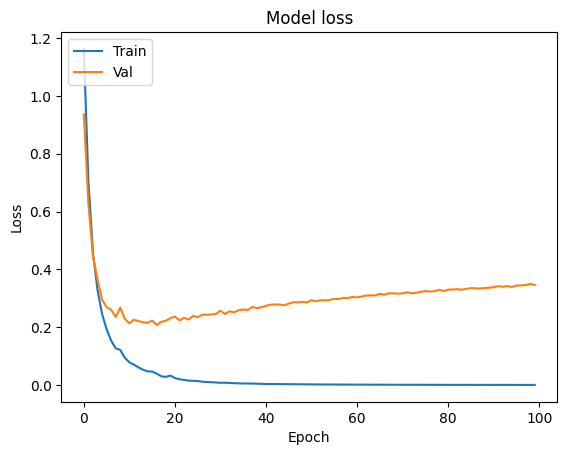

In [ ]:
# Plot training and test loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Exercise 4: Predict the price range of the phones of the test.csv file

In [ ]:
# Read it test data from csv
df_test = pd.read_csv('./data/test.csv')

In [ ]:
# Show column names (pay attention, maybe there is something different)
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
# Convert the data to numpy array
df_test_numpy = df_test.values

In [ ]:
# Show shape of the data
print(type(df_test))
print(type(df_test_numpy.dtype))
print(df_test_numpy)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.dtypes.Float64DType'>
[[1.000e+00 1.043e+03 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+00 8.410e+02 1.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 1.807e+03 1.000e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 ...
 [9.980e+02 1.185e+03 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [9.990e+02 1.533e+03 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.000e+03 1.270e+03 1.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]]


In [ ]:
# Get rid of a column if needed
X = df_test_numpy[:, 1:]
print(X)
print(X.shape)

[[1.043e+03 1.000e+00 1.800e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [8.410e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.807e+03 1.000e+00 2.800e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 ...
 [1.185e+03 0.000e+00 1.400e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.533e+03 1.000e+00 5.000e-01 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.270e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]]
(1000, 20)


In [ ]:
# Normalize data. Important!! Always normalize test data with the mean and
# standard deviation learnt from the training data.
#sc.fit(X) NO HACERLO YA QUE ESTARE HACIENDO UNA DISTRIBUCION DIFERENTE PARA TRAIN Y TEST Y ESO PROBOCARA QUE MI MODLO NO GENERALICE BIEN
X_norm = sc.transform(X)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Show data before and after normalization
print(X)

[[1.043e+03 1.000e+00 1.800e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [8.410e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.807e+03 1.000e+00 2.800e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 ...
 [1.185e+03 0.000e+00 1.400e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.533e+03 1.000e+00 5.000e-01 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.270e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]]


In [ ]:
# Load model saved during the example
from keras.models import load_model
model = load_model('./models/model_1.h5')

In [ ]:
# Predict price range
predictions = model.predict(X_norm)

32/32 [==============================] - 1s 5ms/step


In [ ]:
# Show predictions
print(predictions)

[[1.0558178e-30 1.1170574e-09 3.1875473e-01 6.8124533e-01]
 [3.2647295e-37 1.0318258e-13 1.8954040e-03 9.9810457e-01]
 [1.4511451e-24 1.3911345e-07 9.2280239e-01 7.7197462e-02]
 ...
 [1.2825854e-01 8.7174141e-01 1.3308861e-07 1.0936548e-15]
 [1.6450977e-16 2.5250327e-03 9.9744874e-01 2.6125281e-05]
 [1.0982685e-20 9.5461719e-06 9.9998736e-01 3.0700537e-06]]


In [ ]:
# Convert predictions to scalars from one-hot encoding
# One-hot encoding of labels
pred_scalar=np.argmax(predictions,axis=1) #axis 1 da que las probabilidades me las da las columnas


In [ ]:
# Show all scalar predictions
print(pred_scalar)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 0 3 1 1 3 3 2 0 1 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 1 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 1 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 2 2 0 2 1 1 3 1 1 0 3 2 1 2 1 3 2 3 3 2
 2 3 2 3 1 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 2 0 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 2 0 2 2 2 3 1 2 3 3 3 2 2 1 0 0 1 3 1 2 2 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 0 2 0 3 1 2 0 0 2 1 3 2 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 1 3 1 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 0 0 3 2 0 0 1 0 0 1
 1 0 0 0 3 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 2 2 0 1 2 1 1 0 0
 0 1 2 1 0 2 2 0 2 3 0 0 3 1 2 0 2 3 3 0 3 0 2 3 2 3 0 2 0 2 3 0 1 2 0 0 1
 2 1 3 3 3 2 3 1 2 2 3 3 

In [ ]:
# Show the first test sample in Dataframe format


In [ ]:
# Show the prediction for that sample
